In [17]:
%pip install tabulate

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import pandas as pd
import os

# Базовый путь к данным
base_path = "new_data/"

# Список всех файлов из вашего скриншота
files = [
    "TABLE_D_COMPARE.csv",
    "TABLE_D_EGEMAPS_V01A.csv",
    "TABLE_D_EGEMAPS_V01B.csv",
    "TABLE_D_EGEMAPS_V02.csv",
    "TABLE_D_EGEMAPS.csv",
    "TABLE_D_EMOBASE.csv",
    "TABLE_D_GEMAPS_V01A.csv",
    "TABLE_R_COMPARE.csv",
    "TABLE_R_EGEMAPS_V01A.csv",
    "TABLE_R_EGEMAPS_V01B.csv",
    "TABLE_R_EGEMAPS_V02.csv",
    "TABLE_R_EGEMAPS.csv",
    "TABLE_R_EMOBASE.csv",
    "TABLE_R_GEMAPS_V01A.csv"
]

# Словарь для хранения всех DataFrame
dataframes = {}

# Чтение всех файлов
for file in files:
    file_path = os.path.join(base_path, file)
    try:
        # Читаем CSV файл
        df = pd.read_csv(file_path)
        
        # Сохраняем в словарь, используя имя файла без расширения как ключ
        key_name = file.replace('.csv', '')
        dataframes[key_name] = df
        
        print(f"✅ Успешно загружен: {file} - {df.shape[0]} строк, {df.shape[1]} столбцов")
        
    except Exception as e:
        print(f"❌ Ошибка при загрузке {file}: {e}")

print(f"\n📊 Всего загружено таблиц: {len(dataframes)}")

✅ Успешно загружен: TABLE_D_COMPARE.csv - 95 строк, 6374 столбцов
✅ Успешно загружен: TABLE_D_EGEMAPS_V01A.csv - 95 строк, 89 столбцов
✅ Успешно загружен: TABLE_D_EGEMAPS_V01B.csv - 95 строк, 89 столбцов
✅ Успешно загружен: TABLE_D_EGEMAPS_V02.csv - 95 строк, 89 столбцов
✅ Успешно загружен: TABLE_D_EGEMAPS.csv - 95 строк, 89 столбцов
✅ Успешно загружен: TABLE_D_EMOBASE.csv - 95 строк, 989 столбцов
✅ Успешно загружен: TABLE_D_GEMAPS_V01A.csv - 95 строк, 63 столбцов
✅ Успешно загружен: TABLE_R_COMPARE.csv - 95 строк, 6374 столбцов
✅ Успешно загружен: TABLE_R_EGEMAPS_V01A.csv - 95 строк, 89 столбцов
✅ Успешно загружен: TABLE_R_EGEMAPS_V01B.csv - 95 строк, 89 столбцов
✅ Успешно загружен: TABLE_R_EGEMAPS_V02.csv - 95 строк, 89 столбцов
✅ Успешно загружен: TABLE_R_EGEMAPS.csv - 95 строк, 89 столбцов
✅ Успешно загружен: TABLE_R_EMOBASE.csv - 95 строк, 989 столбцов
✅ Успешно загружен: TABLE_R_GEMAPS_V01A.csv - 95 строк, 63 столбцов

📊 Всего загружено таблиц: 14


In [2]:
# Чтение целевой таблицы с табом как разделителем
target_df = pd.read_csv('data/archive/Признаки_noID_R.csv', sep='\t')

# Проверяем структуру
print("Структура целевой таблицы:")
print(target_df.head())
print(f"Размер: {target_df.shape}")
print(f"Колонки: {list(target_df.columns)}")

# Извлекаем целевые столбцы
target_columns = ['Номер пациента', 'MMSE', 'MoCA', 'CDR']
target_data = target_df[target_columns].copy()

print(f"\nЦелевые данные для join:")
print(target_data.head())

Структура целевой таблицы:
                                                file  ... ФормаРечи
0  /home/vlad/Yandex.Disk/Psych/Demen/DYB/NoID1/3...  ...         R
1  /home/vlad/Yandex.Disk/Psych/Demen/DYB/NoID1/1...  ...         R
2  /home/vlad/Yandex.Disk/Psych/Demen/DYB/NoID1/5...  ...         R
3  /home/vlad/Yandex.Disk/Psych/Demen/DYB/NoID1/5...  ...         R
4  /home/vlad/Yandex.Disk/Psych/Demen/DYB/NoID1/8...  ...         R

[5 rows x 99 columns]
Размер: (95, 99)
Колонки: ['file', 'start', 'end', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean', 'loudness_sma

In [3]:
print("Пример audio_file из существующих таблиц:")
print(dataframes['TABLE_D_COMPARE']['audio_file'].head())

Пример audio_file из существующих таблиц:
0    91.wav
1    21.wav
2    45.wav
3    24.wav
4    96.wav
Name: audio_file, dtype: object


In [4]:
# Извлекаем число из audio_file во всех таблицах
for table_name, df in dataframes.items():
    if 'audio_file' in df.columns:
        dataframes[table_name] = df.copy()
        dataframes[table_name]['patient_id'] = df['audio_file'].str.extract('(\d+)').astype(int)

# Добавляем целевые столбцы ко всем таблицам
target_data_to_join = target_data[['Номер пациента', 'MMSE', 'MoCA', 'CDR']].copy()
target_data_to_join = target_data_to_join.rename(columns={'Номер пациента': 'patient_id'})

# Делаем join для каждой таблицы
for table_name in dataframes.keys():
    if 'patient_id' in dataframes[table_name].columns:
        dataframes[table_name] = dataframes[table_name].merge(
            target_data_to_join, 
            on='patient_id', 
            how='left'
        )
        
print("✅ Join выполнен для всех таблиц")
print(f"Добавлены колонки: MMSE, MoCA, CDR")
print(f"Пример из TABLE_D_COMPARE:")
print(dataframes['TABLE_D_COMPARE'][['audio_file', 'patient_id', 'MMSE', 'MoCA', 'CDR']].head())

✅ Join выполнен для всех таблиц
Добавлены колонки: MMSE, MoCA, CDR
Пример из TABLE_D_COMPARE:
  audio_file  patient_id  MMSE  MoCA  CDR
0     91.wav          91  14.0   6.0  2.0
1     21.wav          21  30.0    26  0.0
2     45.wav          45  25.0    14  1.0
3     24.wav          24  28.0    24  0.0
4     96.wav          96  30.0  27.0  0.0


In [5]:
rules = {
'MMSE': ('<', 23.5), # пример: 1 если MMSE < 23.5
'MoCA': ('<', 25.5), # пример: 1 если MoCA < 25.5
'CDR': ('>', 0.75), # пример: 1 если CDR > 0.75
}

ops = {
'<': lambda s, t: s < t,
'<=': lambda s, t: s <= t,
'>': lambda s, t: s > t,
'>=': lambda s, t: s >= t,
'==': lambda s, t: s == t,
'!=': lambda s, t: s != t,
}

In [6]:
def add_targets(d: pd.DataFrame, rules: dict, prefix='t_', decimal_comma=True):
    created = []
    for col, (op, thr) in rules.items():
        if col not in d.columns:
            print(f'Внимание: в датафрейме нет столбца {col}')
            continue
        if op not in ops:
            raise ValueError(f'Неизвестный оператор {op} для {col}')
        s = d[col].astype(str)
        if decimal_comma:
            s = s.str.replace(',', '.', regex=False)  # на случай десятичной запятой
        vals = pd.to_numeric(s, errors='coerce')  # -> число, некорректные -> NaN

        res = pd.Series(pd.NA, index=d.index, dtype='Int8')  # 0/1/NA
        mask = vals.notna()
        res[mask] = ops[op](vals[mask], thr).astype('int8')
        tcol = f'{prefix}{col}'
        d[tcol] = res
        created.append(tcol)
    return created

In [7]:
for table_name, df in dataframes.items():
    if all(col in df.columns for col in ['MMSE', 'MoCA', 'CDR']):
        created_targets = add_targets(df, rules, prefix='t_')
        print(f"✅ {table_name}: добавлены таргеты {created_targets}")

# Проверяем результат
print("\nПроверка таргетов в TABLE_D_COMPARE:")
target_cols = ['MMSE', 'MoCA', 'CDR', 't_MMSE', 't_MoCA', 't_CDR']
print(dataframes['TABLE_D_COMPARE'][target_cols].head())

✅ TABLE_D_COMPARE: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_D_EGEMAPS_V01A: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_D_EGEMAPS_V01B: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_D_EGEMAPS_V02: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_D_EGEMAPS: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_D_EMOBASE: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_D_GEMAPS_V01A: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_R_COMPARE: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_R_EGEMAPS_V01A: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_R_EGEMAPS_V01B: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_R_EGEMAPS_V02: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_R_EGEMAPS: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_R_EMOBASE: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']
✅ TABLE_R_GEMAPS_V01A: добавлены таргеты ['t_MMSE', 't_MoCA', 't_CDR']

Проверка таргетов в TABLE

In [8]:
from scipy.stats import mannwhitneyu
import numpy as np
from tqdm import tqdm

def permutation_test(x, y, n_permutations=1000):
    """Перестановочный тест (ОДР)"""
    obs_diff = np.mean(x) - np.mean(y)
    combined = np.concatenate([x, y])
    count = 0
    
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        perm_x = combined[:len(x)]
        perm_y = combined[len(x):]
        perm_diff = np.mean(perm_x) - np.mean(perm_y)
        if abs(perm_diff) >= abs(obs_diff):
            count += 1
    
    return count / n_permutations

def analyze_features_by_target(df, target_col, feature_cols=None, alpha=0.05):
    """
    Анализ различий фичей между группами по таргету
    """
    if feature_cols is None:
        # Исключаем не-фичи
        exclude_cols = ['audio_file', 'patient_id', 'MMSE', 'MoCA', 'CDR', 
                       't_MMSE', 't_MoCA', 't_CDR', 'Пол', 'Возраст', 'Группа', 'ФормаРечи']
        feature_cols = [col for col in df.columns if col not in exclude_cols and df[col].dtype in ['float64', 'int64']]
    
    group_0 = df[df[target_col] == 0].dropna(subset=[target_col])
    group_1 = df[df[target_col] == 1].dropna(subset=[target_col])
    
    results = []
    
    for feature in tqdm(feature_cols, desc=f"Анализ {target_col}"):
        try:
            # Убираем пропуски
            x = group_0[feature].dropna()
            y = group_1[feature].dropna()
            
            if len(x) < 3 or len(y) < 3:
                continue
                
            # Тест Манна-Уитни
            mw_stat, mw_p = mannwhitneyu(x, y, alternative='two-sided')
            
            # Перестановочный тест
            perm_p = permutation_test(x.values, y.values)
            
            results.append({
                'feature': feature,
                'mw_pvalue': mw_p,
                'perm_pvalue': perm_p,
                'n_group_0': len(x),
                'n_group_1': len(y),
                'mean_group_0': np.mean(x),
                'mean_group_1': np.mean(y)
            })
            
        except Exception as e:
            continue
    
    results_df = pd.DataFrame(results)
    
    # Коррекция Бенджамини-Хохберга
    from statsmodels.stats.multitest import multipletests
    rejected, corrected_p, _, _ = multipletests(results_df['mw_pvalue'], alpha=alpha, method='fdr_bh')
    results_df['mw_pvalue_corrected'] = corrected_p
    results_df['significant'] = rejected
    
    return results_df.sort_values('mw_pvalue')

# Анализ для каждого таргета
targets = ['t_MMSE', 't_MoCA', 't_CDR']

for target in targets:
    print(f"\n{'='*60}")
    print(f"АНАЛИЗ ДЛЯ ТАРГЕТА: {target}")
    print(f"{'='*60}")
    
    # Используем TABLE_D_EGEMAPS для сравнения с примером
    if 'TABLE_D_EGEMAPS' in dataframes:
        results = analyze_features_by_target(dataframes['TABLE_D_EGEMAPS'], target)
        
        # Выводим значимые фичи
        significant_results = results[results['significant']].head(15)
        
        print(f"\nЗначимые фичи (после коррекции FDR):")
        print(f"{'№':<3} {'Фича':<40} {'p-Манн-Уитни':<15} {'p-ОДР':<15}")
        print("-" * 80)
        
        for i, (idx, row) in enumerate(significant_results.iterrows(), 1):
            print(f"{i:<3} {row['feature']:<40} {row['mw_pvalue']:<15.6f} {row['perm_pvalue']:<15.6f}")

# Дополнительно: можем посмотреть распределение по всем таблицам
print(f"\n{'='*60}")
print("РАСПРЕДЕЛЕНИЕ ТАРГЕТОВ ПО ГРУППАМ:")
print(f"{'='*60}")

for target in targets:
    print(f"\n{target}:")
    for table_name in ['TABLE_D_EGEMAPS', 'TABLE_R_EGEMAPS']:
        if table_name in dataframes:
            df = dataframes[table_name]
            if target in df.columns:
                counts = df[target].value_counts()
                print(f"  {table_name}: 0={counts.get(0, 0)}, 1={counts.get(1, 0)}, NA={df[target].isna().sum()}")


АНАЛИЗ ДЛЯ ТАРГЕТА: t_MMSE


Анализ t_MMSE: 100%|██████████| 88/88 [00:01<00:00, 54.65it/s]



Значимые фичи (после коррекции FDR):
№   Фича                                     p-Манн-Уитни    p-ОДР          
--------------------------------------------------------------------------------

АНАЛИЗ ДЛЯ ТАРГЕТА: t_MoCA


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 54.64it/s]


Значимые фичи (после коррекции FDR):


№   Фича                                     p-Манн-Уитни    p-ОДР          
--------------------------------------------------------------------------------

АНАЛИЗ ДЛЯ ТАРГЕТА: t_CDR


Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 54.55it/s]


Значимые фичи (после коррекции FDR):
№   Фича                                     p-Манн-Уитни    p-ОДР          
--------------------------------------------------------------------------------
1   loudness_sma3_percentile50.0             0.000013        0.000000       
2   loudness_sma3_amean                      0.000101        0.000000       
3   loudness_sma3_meanFallingSlope           0.000109        0.000000       
4   loudnessPeaksPerSec                      0.000113        0.562000       
5   spectralFluxUV_sma3nz_amean              0.000143        0.001000       
6   loudness_sma3_stddevFallingSlope         0.000197        0.000000       
7   loudness_sma3_percentile80.0             0.000519        0.000000       
8   spectralFlux_sma3_amean                  0.000619        0.002000       
9   loudness_sma3_percentile20.0             0.000670        0.006000       
10  loudness_sma3_stddevNorm                 0.000785        0.002000       
11  loudness_sma3_meanRisingSlope 

Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 54.73it/s]



Визуализация для t_CDR:


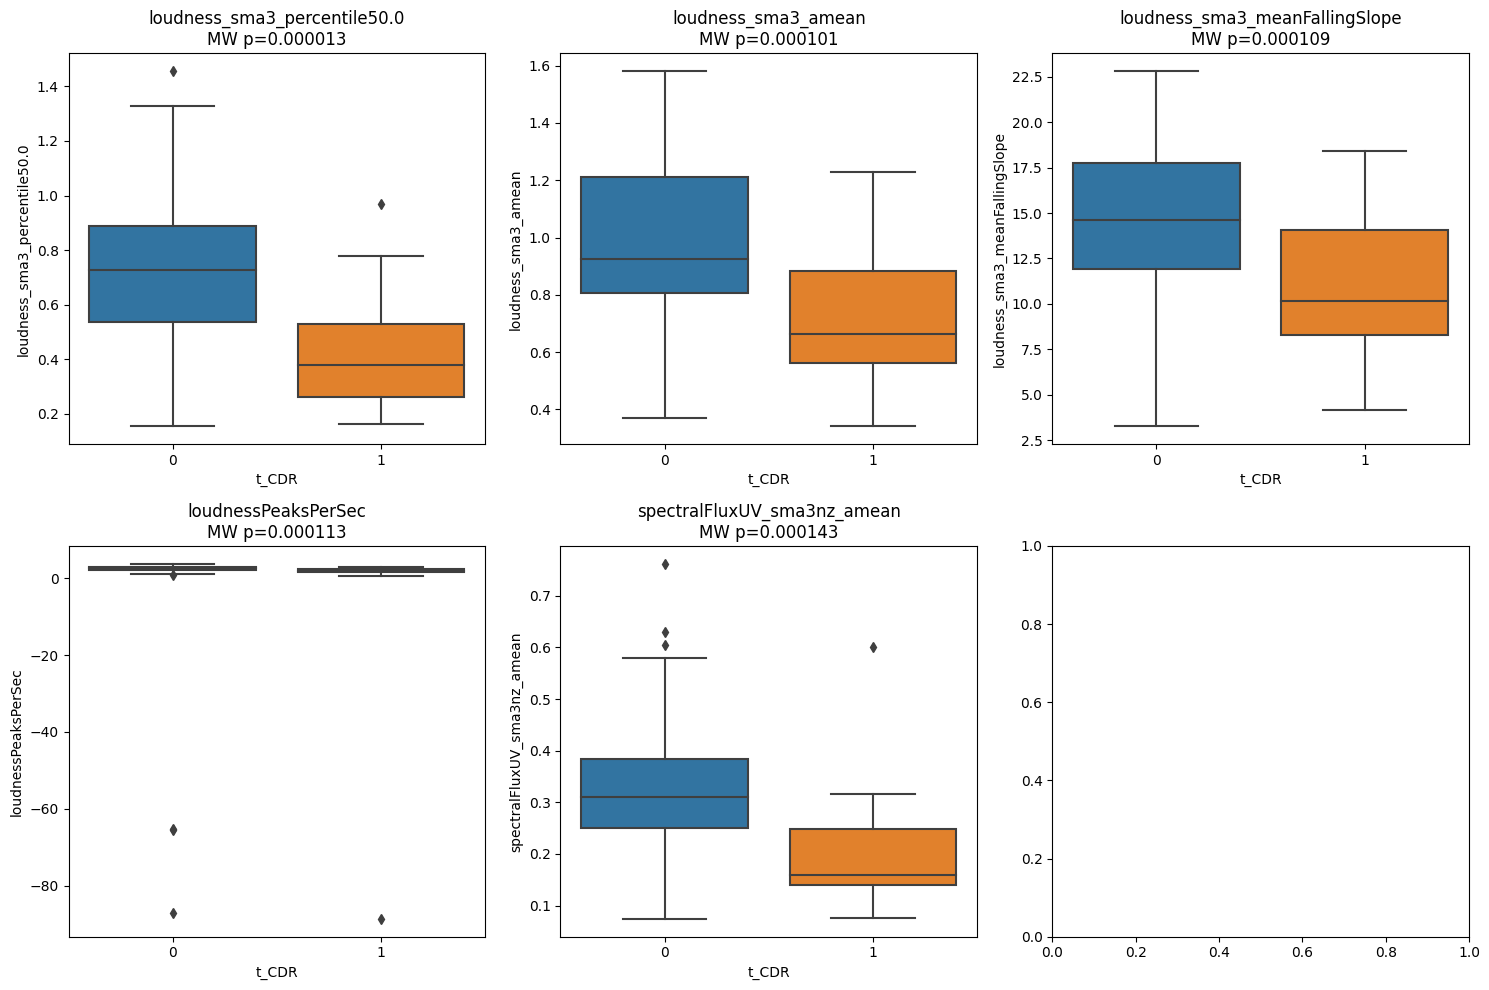

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация топ-фич
def plot_top_features(results_df, target_name, n_top=5):
    top_features = results_df.head(n_top)
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, (idx, row) in enumerate(top_features.iterrows()):
        if i >= len(axes):
            break
            
        feature = row['feature']
        df_plot = dataframes['TABLE_D_EGEMAPS'][[feature, target_name]].dropna()
        
        sns.boxplot(data=df_plot, x=target_name, y=feature, ax=axes[i])
        axes[i].set_title(f"{feature}\nMW p={row['mw_pvalue']:.6f}")
    
    plt.tight_layout()
    plt.show()

# Для каждого таргета строим графики
for target in targets:
    if 'TABLE_D_EGEMAPS' in dataframes:
        results = analyze_features_by_target(dataframes['TABLE_D_EGEMAPS'], target)
        significant_results = results[results['significant']]
        
        if len(significant_results) > 0:
            print(f"\nВизуализация для {target}:")
            plot_top_features(significant_results, target)
            

In [10]:
# Анализ для каждого таргета по каждой таблице отдельно
targets = ['t_CDR', 't_MMSE', 't_MoCA']
tables_to_analyze = [name for name in dataframes.keys() if name not in ['MASTER_TABLE_ALL_FEATURES']]

for target in targets:
    print(f"\n{'='*100}")
    print(f"АНАЛИЗ ДЛЯ ТАРГЕТА: {target}")
    print(f"{'='*100}")
    
    for table_name in tables_to_analyze:
        print(f"\n📊 ТАБЛИЦА: {table_name}")
        print("-" * 80)
        
        df = dataframes[table_name]
        
        if target not in df.columns:
            print("   ❌ Таргет отсутствует в таблице")
            continue
        
        # Получаем числовые фичи
        exclude_cols = ['audio_file', 'patient_id', 'MMSE', 'MoCA', 'CDR', 
                       't_MMSE', 't_MoCA', 't_CDR', 'Пол', 'Возраст', 'Группа', 'ФормаРечи']
        feature_cols = [col for col in df.columns if col not in exclude_cols and 
                       pd.api.types.is_numeric_dtype(df[col])]
        
        # Анализ для конкретной таблицы
        results = analyze_features_by_target(df, target, feature_cols)
        significant_results = results[results['significant']]
        
        if not significant_results.empty:
            print(f"   ✅ Найдено значимых признаков: {len(significant_results)}")
            
            # Показываем топ-10 самых значимых
            top_10 = significant_results.head(10).copy()
            top_10['p_Манн_Уитни'] = top_10['mw_pvalue'].apply(lambda x: f"{x:.2e}")
            top_10['p_ОДР'] = top_10['perm_pvalue'].apply(lambda x: f"{x:.3f}")
            top_10['Разность_средних'] = (top_10['mean_group_1'] - top_10['mean_group_0']).round(4)
            
            print(f"\n   Топ-10 наиболее значимых признаков:")
            print("   " + "-" * 90)
            print(f"   {'№':<3} {'Признак':<50} {'p-Манн-Уитни':<15} {'p-ОДР':<10} {'Разность':<10}")
            print("   " + "-" * 90)
            
            for i, (_, row) in enumerate(top_10.iterrows(), 1):
                print(f"   {i:<3} {row['feature']:<50} {row['p_Манн_Уитни']:<15} {row['p_ОДР']:<10} {row['Разность_средних']:<10}")
                
        else:
            print("   ❌ Не найдено значимых признаков")
        
        # Статистика по группам
        group_counts = df[target].value_counts()
        print(f"\n   📈 Распределение по группам: 0={group_counts.get(0, 0)}, 1={group_counts.get(1, 0)}, NA={df[target].isna().sum()}")

# Сохранение отдельными листами для каждой таблицы
try:
    with pd.ExcelWriter('результаты_по_таблицам.xlsx') as writer:
        for table_name in tables_to_analyze:
            print(f"\n💾 Сохраняем результаты для {table_name}...")
            
            all_table_results = []
            
            for target in targets:
                df = dataframes[table_name]
                
                if target not in df.columns:
                    continue
                
                # Анализ для конкретной таблицы и таргета
                exclude_cols = ['audio_file', 'patient_id', 'MMSE', 'MoCA', 'CDR', 
                               't_MMSE', 't_MoCA', 't_CDR', 'Пол', 'Возраст', 'Группа', 'ФормаРечи']
                feature_cols = [col for col in df.columns if col not in exclude_cols and 
                               pd.api.types.is_numeric_dtype(df[col])]
                
                results = analyze_features_by_target(df, target, feature_cols)
                significant_results = results[results['significant']]
                
                # Добавляем информацию о таргете
                for _, row in significant_results.iterrows():
                    all_table_results.append({
                        'Таргет': target,
                        'Признак': row['feature'],
                        'p_Манн_Уитни': row['mw_pvalue'],
                        'p_ОДР': row['perm_pvalue'],
                        'n_группа_0': row['n_group_0'],
                        'n_группа_1': row['n_group_1'],
                        'среднее_группа_0': row['mean_group_0'],
                        'среднее_группа_1': row['mean_group_1'],
                        'разность_средних': row['mean_group_1'] - row['mean_group_0']
                    })
            
            if all_table_results:
                results_df = pd.DataFrame(all_table_results)
                # Форматируем для читаемости
                results_df['p_Манн_Уитни'] = results_df['p_Манн_Уитни'].apply(lambda x: f"{x:.2e}")
                results_df['p_ОДР'] = results_df['p_ОДР'].apply(lambda x: f"{x:.3f}")
                results_df['разность_средних'] = results_df['разность_средних'].round(4)
                
                # Сохраняем на отдельный лист
                sheet_name = table_name[:31]  # Ограничение длины имени листа в Excel
                results_df.to_excel(writer, sheet_name=sheet_name, index=False)
    
    print("\n✅ Все результаты сохранены в 'результаты_по_таблицам.xlsx'")
    
except Exception as e:
    print(f"❌ Ошибка при сохранении в Excel: {e}")


АНАЛИЗ ДЛЯ ТАРГЕТА: t_CDR

📊 ТАБЛИЦА: TABLE_D_COMPARE
--------------------------------------------------------------------------------


Анализ t_CDR: 100%|██████████| 6373/6373 [01:57<00:00, 54.24it/s]


   ✅ Найдено значимых признаков: 764

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   mfcc_sma_de[1]_lpc1                                2.44e-06        0.000      -0.2058   
   2   mfcc_sma[1]_lpc0                                   3.28e-06        0.000      0.0846    
   3   mfcc_sma[1]_lpc1                                   5.19e-06        0.000      -0.159    
   4   pcm_fftMag_fband1000-4000_sma_quartile2            5.87e-06        0.007      -0.0058   
   5   mfcc_sma_de[1]_lpc2                                6.92e-06        0.000      0.217     
   6   mfcc_sma[7]_meanRisingSlope                        7.82e-06        0.000      -22.6911  
   7   mfcc_sma_de[1]_lpc0                                8.48e

Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 54.67it/s]


   ✅ Найдено значимых признаков: 16

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudness_sma3_percentile50.0                       1.32e-05        0.000      -0.2968   
   2   loudnessPeaksPerSec                                4.04e-05        0.000      -0.6261   
   3   loudness_sma3_amean                                1.01e-04        0.000      -0.2667   
   4   loudness_sma3_meanFallingSlope                     1.09e-04        0.000      -3.7352   
   5   loudness_sma3_stddevFallingSlope                   1.97e-04        0.000      -2.4022   
   6   spectralFlux_sma3_amean                            3.50e-04        0.001      -0.2524   
   7   spectralFluxUV_sma3nz_amean                        3.74e-

Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 53.76it/s]


   ✅ Найдено значимых признаков: 16

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudness_sma3_percentile50.0                       1.32e-05        0.000      -0.2968   
   2   loudnessPeaksPerSec                                4.04e-05        0.000      -0.6261   
   3   loudness_sma3_amean                                1.01e-04        0.000      -0.2667   
   4   loudness_sma3_meanFallingSlope                     1.09e-04        0.000      -3.7352   
   5   loudness_sma3_stddevFallingSlope                   1.97e-04        0.000      -2.4022   
   6   spectralFlux_sma3_amean                            3.50e-04        0.000      -0.2524   
   7   spectralFluxUV_sma3nz_amean                        3.74e-

Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 53.70it/s]


   ✅ Найдено значимых признаков: 16

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudness_sma3_percentile50.0                       1.32e-05        0.000      -0.2968   
   2   loudnessPeaksPerSec                                4.04e-05        0.000      -0.6261   
   3   loudness_sma3_amean                                1.01e-04        0.000      -0.2667   
   4   loudness_sma3_meanFallingSlope                     1.09e-04        0.000      -3.7352   
   5   loudness_sma3_stddevFallingSlope                   1.97e-04        0.000      -2.4022   
   6   spectralFlux_sma3_amean                            3.50e-04        0.000      -0.2524   
   7   spectralFluxUV_sma3nz_amean                        3.74e-

Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 54.20it/s]


   ✅ Найдено значимых признаков: 16

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudness_sma3_percentile50.0                       1.32e-05        0.000      -0.2968   
   2   loudness_sma3_amean                                1.01e-04        0.000      -0.2667   
   3   loudness_sma3_meanFallingSlope                     1.09e-04        0.000      -3.7352   
   4   loudnessPeaksPerSec                                1.13e-04        0.573      -1.4578   
   5   spectralFluxUV_sma3nz_amean                        1.43e-04        0.001      -0.1241   
   6   loudness_sma3_stddevFallingSlope                   1.97e-04        0.000      -2.4022   
   7   loudness_sma3_percentile80.0                       5.19e-

Анализ t_CDR: 100%|██████████| 988/988 [00:18<00:00, 54.25it/s]


   ✅ Найдено значимых признаков: 215

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   pcm_loudness_sma_de_quartile3                      1.95e-05        0.000      -0.0122   
   2   pcm_loudness_sma_de_iqr2-3                         3.35e-05        0.000      -0.0126   
   3   pcm_loudness_sma_quartile2                         4.52e-05        0.000      -0.1641   
   4   pcm_intensity_sma_iqr1-2                           5.06e-05        0.007      -0.0      
   5   pcm_intensity_sma_quartile2                        5.06e-05        0.007      -0.0      
   6   pcm_loudness_sma_de_iqr1-3                         5.45e-05        0.000      -0.0255   
   7   pcm_intensity_sma_de_iqr2-3                        6.79e

Анализ t_CDR: 100%|██████████| 62/62 [00:01<00:00, 54.95it/s]

   ✅ Найдено значимых признаков: 11

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudness_sma3_percentile50.0                       1.32e-05        0.000      -0.2968   
   2   loudnessPeaksPerSec                                4.04e-05        0.000      -0.6261   
   3   loudness_sma3_amean                                1.01e-04        0.000      -0.2667   
   4   loudness_sma3_meanFallingSlope                     1.09e-04        0.000      -3.7352   
   5   loudness_sma3_stddevFallingSlope                   1.97e-04        0.000      -2.4022   
   6   loudness_sma3_percentile80.0                       5.19e-04        0.000      -0.4054   
   7   loudness_sma3_percentile20.0                       6.70e-


Анализ t_CDR: 100%|██████████| 6373/6373 [01:57<00:00, 54.26it/s]


   ✅ Найдено значимых признаков: 1620

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   audSpec_Rfilt_sma[5]_minSegLen                     3.27e-08        0.000      5.1066    
   2   audSpec_Rfilt_sma[3]_minSegLen                     5.89e-08        0.000      9.5264    
   3   audSpec_Rfilt_sma[6]_minSegLen                     1.73e-07        0.000      0.6849    
   4   audSpec_Rfilt_sma[7]_minSegLen                     2.39e-07        0.000      3.2163    
   5   mfcc_sma[3]_meanPeakDist                           5.48e-07        0.000      0.0446    
   6   mfcc_sma[1]_peakDistStddev                         8.57e-07        0.000      0.062     
   7   mfcc_sma[1]_meanPeakDist                           9.37

Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 54.28it/s]


   ✅ Найдено значимых признаков: 17

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudnessPeaksPerSec                                1.22e-05        0.000      -0.7171   
   2   loudness_sma3_percentile20.0                       1.27e-05        0.000      -0.1578   
   3   loudness_sma3_meanFallingSlope                     1.78e-04        0.000      -3.6932   
   4   spectralFluxUV_sma3nz_amean                        4.13e-04        0.002      -0.1345   
   5   loudness_sma3_percentile50.0                       5.19e-04        0.000      -0.2764   
   6   loudness_sma3_stddevFallingSlope                   5.53e-04        0.000      -1.9923   
   7   loudness_sma3_stddevNorm                           5.53e-

Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 54.56it/s]


   ✅ Найдено значимых признаков: 17

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudnessPeaksPerSec                                1.22e-05        0.000      -0.7171   
   2   loudness_sma3_percentile20.0                       1.27e-05        0.000      -0.1578   
   3   loudness_sma3_meanFallingSlope                     1.78e-04        0.000      -3.6932   
   4   spectralFluxUV_sma3nz_amean                        4.13e-04        0.001      -0.1345   
   5   loudness_sma3_percentile50.0                       5.19e-04        0.000      -0.2764   
   6   loudness_sma3_stddevFallingSlope                   5.53e-04        0.000      -1.9923   
   7   loudness_sma3_stddevNorm                           5.53e-

Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 54.53it/s]


   ✅ Найдено значимых признаков: 17

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudnessPeaksPerSec                                1.22e-05        0.000      -0.7171   
   2   loudness_sma3_percentile20.0                       1.27e-05        0.000      -0.1578   
   3   loudness_sma3_meanFallingSlope                     1.78e-04        0.000      -3.6932   
   4   spectralFluxUV_sma3nz_amean                        4.13e-04        0.001      -0.1345   
   5   loudness_sma3_percentile50.0                       5.19e-04        0.000      -0.2764   
   6   loudness_sma3_stddevFallingSlope                   5.53e-04        0.001      -1.9923   
   7   loudness_sma3_stddevNorm                           5.53e-

Анализ t_CDR: 100%|██████████| 88/88 [00:01<00:00, 55.35it/s]


   ✅ Найдено значимых признаков: 11

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudness_sma3_percentile20.0                       1.27e-05        0.000      -0.1578   
   2   loudnessPeaksPerSec                                4.04e-05        0.915      -0.3697   
   3   loudness_sma3_meanFallingSlope                     1.78e-04        0.001      -3.6932   
   4   loudness_sma3_percentile50.0                       5.19e-04        0.000      -0.2764   
   5   loudness_sma3_stddevFallingSlope                   5.53e-04        0.000      -1.9923   
   6   loudness_sma3_stddevNorm                           5.53e-04        0.000      0.0774    
   7   spectralFluxUV_sma3nz_amean                        7.12e-

Анализ t_CDR: 100%|██████████| 988/988 [00:18<00:00, 54.37it/s]


   ✅ Найдено значимых признаков: 255

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   pcm_loudness_sma_de_linregc1                       4.22e-06        0.000      0.0       
   2   mfcc_sma_de[12]_linregc1                           1.12e-05        0.000      -0.0      
   3   lspFreq_sma_de[6]_kurtosis                         1.74e-05        0.000      0.8843    
   4   mfcc_sma_de[3]_quartile1                           1.81e-05        0.000      0.2472    
   5   pcm_loudness_sma_de_quartile3                      1.81e-05        0.000      -0.0168   
   6   pcm_loudness_sma_de_linregc2                       1.95e-05        0.000      -0.0001   
   7   pcm_loudness_sma_de_iqr1-3                         2.03e

Анализ t_CDR: 100%|██████████| 62/62 [00:01<00:00, 53.43it/s]

   ✅ Найдено значимых признаков: 10

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudnessPeaksPerSec                                1.22e-05        0.000      -0.7171   
   2   loudness_sma3_percentile20.0                       1.27e-05        0.000      -0.1578   
   3   loudness_sma3_meanFallingSlope                     1.78e-04        0.000      -3.6932   
   4   loudness_sma3_percentile50.0                       5.19e-04        0.000      -0.2764   
   5   loudness_sma3_stddevFallingSlope                   5.53e-04        0.000      -1.9923   
   6   loudness_sma3_stddevNorm                           5.53e-04        0.001      0.0774    
   7   loudness_sma3_amean                                8.90e-


Анализ t_MMSE: 100%|██████████| 6373/6373 [01:57<00:00, 54.45it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=79, 1=16, NA=0

📊 ТАБЛИЦА: TABLE_D_EGEMAPS_V01A
--------------------------------------------------------------------------------


Анализ t_MMSE: 100%|██████████| 88/88 [00:01<00:00, 54.16it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=79, 1=16, NA=0

📊 ТАБЛИЦА: TABLE_D_EGEMAPS_V01B
--------------------------------------------------------------------------------


Анализ t_MMSE: 100%|██████████| 88/88 [00:01<00:00, 54.51it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=79, 1=16, NA=0

📊 ТАБЛИЦА: TABLE_D_EGEMAPS_V02
--------------------------------------------------------------------------------


Анализ t_MMSE: 100%|██████████| 88/88 [00:01<00:00, 55.02it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=79, 1=16, NA=0

📊 ТАБЛИЦА: TABLE_D_EGEMAPS
--------------------------------------------------------------------------------


Анализ t_MMSE: 100%|██████████| 88/88 [00:01<00:00, 54.51it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=79, 1=16, NA=0

📊 ТАБЛИЦА: TABLE_D_EMOBASE
--------------------------------------------------------------------------------


Анализ t_MMSE: 100%|██████████| 988/988 [00:18<00:00, 54.63it/s]

   ❌ Не найдено значимых признаков



   📈 Распределение по группам: 0=79, 1=16, NA=0

📊 ТАБЛИЦА: TABLE_D_GEMAPS_V01A
--------------------------------------------------------------------------------


Анализ t_MMSE: 100%|██████████| 62/62 [00:01<00:00, 54.49it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=79, 1=16, NA=0

📊 ТАБЛИЦА: TABLE_R_COMPARE
--------------------------------------------------------------------------------


Анализ t_MMSE: 100%|██████████| 6373/6373 [01:56<00:00, 54.54it/s]


   ✅ Найдено значимых признаков: 835

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   audSpec_Rfilt_sma[1]_minSegLen                     1.18e-05        0.000      0.7625    
   2   pcm_fftMag_fband250-650_sma_minSegLen              1.29e-05        0.000      0.9179    
   3   pcm_fftMag_spectralHarmonicity_sma_minSegLen       1.42e-05        0.000      0.9033    
   4   audSpec_Rfilt_sma[8]_minSegLen                     1.48e-05        0.000      0.8703    
   5   audspecRasta_lengthL1norm_sma_minSegLen            1.98e-05        0.000      1.3639    
   6   audSpec_Rfilt_sma[10]_minSegLen                    2.12e-05        0.982      -0.36     
   7   audSpec_Rfilt_sma[6]_minSegLen                     2.12e

Анализ t_MMSE: 100%|██████████| 88/88 [00:01<00:00, 55.20it/s]

   ✅ Найдено значимых признаков: 13



   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   spectralFlux_sma3_amean                            1.74e-04        0.000      -0.3449   
   2   spectralFluxV_sma3nz_amean                         2.12e-04        0.001      -0.4098   
   3   loudness_sma3_percentile50.0                       3.01e-04        0.000      -0.3013   
   4   loudness_sma3_percentile20.0                       5.10e-04        0.000      -0.1408   
   5   loudness_sma3_meanFallingSlope                     5.10e-04        0.001      -3.7647   
   6   loudnessPeaksPerSec                                5.29e-04        0.000      -0.6294   
   7   loudness_sma3_amean                                5.91e-04        0.001      -0.2811   
   

Анализ t_MMSE: 100%|██████████| 88/88 [00:01<00:00, 55.12it/s]


   ✅ Найдено значимых признаков: 13

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   spectralFlux_sma3_amean                            1.74e-04        0.000      -0.3449   
   2   spectralFluxV_sma3nz_amean                         2.12e-04        0.000      -0.4098   
   3   loudness_sma3_percentile50.0                       3.01e-04        0.001      -0.3013   
   4   loudness_sma3_percentile20.0                       5.10e-04        0.002      -0.1408   
   5   loudness_sma3_meanFallingSlope                     5.10e-04        0.000      -3.7647   
   6   loudnessPeaksPerSec                                5.29e-04        0.000      -0.6294   
   7   loudness_sma3_amean                                5.91e-

Анализ t_MMSE: 100%|██████████| 88/88 [00:01<00:00, 54.63it/s]


   ✅ Найдено значимых признаков: 13

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   spectralFlux_sma3_amean                            1.74e-04        0.000      -0.3449   
   2   spectralFluxV_sma3nz_amean                         2.12e-04        0.000      -0.4098   
   3   loudness_sma3_percentile50.0                       3.01e-04        0.000      -0.3013   
   4   loudness_sma3_percentile20.0                       5.10e-04        0.000      -0.1408   
   5   loudness_sma3_meanFallingSlope                     5.10e-04        0.000      -3.7647   
   6   loudnessPeaksPerSec                                5.29e-04        0.000      -0.6294   
   7   loudness_sma3_amean                                5.91e-

Анализ t_MMSE: 100%|██████████| 88/88 [00:01<00:00, 55.41it/s]


   ✅ Найдено значимых признаков: 13

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudness_sma3_percentile50.0                       3.01e-04        0.000      -0.3013   
   2   loudnessPeaksPerSec                                3.50e-04        0.080      -7.1551   
   3   loudness_sma3_percentile20.0                       5.10e-04        0.000      -0.1408   
   4   loudness_sma3_meanFallingSlope                     5.10e-04        0.000      -3.7647   
   5   loudness_sma3_amean                                5.91e-04        0.000      -0.2811   
   6   loudness_sma3_meanRisingSlope                      1.70e-03        0.004      -3.8531   
   7   spectralFlux_sma3_amean                            2.31e-

Анализ t_MMSE: 100%|██████████| 988/988 [00:18<00:00, 54.16it/s]


   ✅ Найдено значимых признаков: 220

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   pcm_loudness_sma_de_linregc2                       4.24e-06        0.000      -0.0002   
   2   pcm_intensity_sma_de_linregc1                      4.66e-06        0.000      0.0       
   3   pcm_loudness_sma_de_linregc1                       5.37e-06        0.001      0.0       
   4   pcm_loudness_sma_de_linregerrA                     1.94e-05        0.000      -0.0224   
   5   pcm_loudness_sma_de_iqr1-2                         2.22e-05        0.000      -0.0184   
   6   pcm_intensity_sma_de_linregc2                      2.54e-05        0.000      -0.0      
   7   pcm_loudness_sma_de_quartile1                      3.16e

Анализ t_MMSE: 100%|██████████| 62/62 [00:01<00:00, 54.42it/s]


   ✅ Найдено значимых признаков: 9

   Топ-10 наиболее значимых признаков:
   ------------------------------------------------------------------------------------------
   №   Признак                                            p-Манн-Уитни    p-ОДР      Разность  
   ------------------------------------------------------------------------------------------
   1   loudness_sma3_percentile50.0                       3.01e-04        0.000      -0.3013   
   2   loudness_sma3_meanFallingSlope                     5.10e-04        0.002      -3.7647   
   3   loudness_sma3_percentile20.0                       5.10e-04        0.003      -0.1408   
   4   loudnessPeaksPerSec                                5.29e-04        0.000      -0.6294   
   5   loudness_sma3_amean                                5.91e-04        0.000      -0.2811   
   6   loudness_sma3_meanRisingSlope                      1.70e-03        0.003      -3.8531   
   7   loudness_sma3_percentile80.0                       2.38e-0

Анализ t_MoCA: 100%|██████████| 6373/6373 [01:56<00:00, 54.73it/s]

   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_D_EGEMAPS_V01A
--------------------------------------------------------------------------------



Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 54.64it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_D_EGEMAPS_V01B
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 54.02it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_D_EGEMAPS_V02
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 55.07it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_D_EGEMAPS
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 55.29it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_D_EMOBASE
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 988/988 [00:18<00:00, 54.85it/s]

   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_D_GEMAPS_V01A
--------------------------------------------------------------------------------



Анализ t_MoCA: 100%|██████████| 62/62 [00:01<00:00, 54.26it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_R_COMPARE
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 6373/6373 [01:57<00:00, 54.45it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_R_EGEMAPS_V01A
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 55.09it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_R_EGEMAPS_V01B
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 54.53it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_R_EGEMAPS_V02
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 54.36it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_R_EGEMAPS
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 55.67it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_R_EMOBASE
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 988/988 [00:18<00:00, 54.40it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

📊 ТАБЛИЦА: TABLE_R_GEMAPS_V01A
--------------------------------------------------------------------------------


Анализ t_MoCA: 100%|██████████| 62/62 [00:01<00:00, 54.85it/s]


   ❌ Не найдено значимых признаков

   📈 Распределение по группам: 0=25, 1=65, NA=5

💾 Сохраняем результаты для TABLE_D_COMPARE...


Анализ t_MoCA: 100%|██████████| 6373/6373 [01:56<00:00, 54.63it/s]



💾 Сохраняем результаты для TABLE_D_EGEMAPS_V01A...


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 54.48it/s]



💾 Сохраняем результаты для TABLE_D_EGEMAPS_V01B...


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 55.04it/s]



💾 Сохраняем результаты для TABLE_D_EGEMAPS_V02...


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 55.06it/s]



💾 Сохраняем результаты для TABLE_D_EGEMAPS...


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 55.22it/s]



💾 Сохраняем результаты для TABLE_D_EMOBASE...


Анализ t_MoCA: 100%|██████████| 988/988 [00:18<00:00, 54.78it/s]



💾 Сохраняем результаты для TABLE_D_GEMAPS_V01A...


Анализ t_MoCA: 100%|██████████| 62/62 [00:01<00:00, 54.99it/s]



💾 Сохраняем результаты для TABLE_R_COMPARE...


Анализ t_MoCA: 100%|██████████| 6373/6373 [01:57<00:00, 54.43it/s]



💾 Сохраняем результаты для TABLE_R_EGEMAPS_V01A...


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 54.80it/s]



💾 Сохраняем результаты для TABLE_R_EGEMAPS_V01B...


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 55.00it/s]



💾 Сохраняем результаты для TABLE_R_EGEMAPS_V02...


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 54.30it/s]



💾 Сохраняем результаты для TABLE_R_EGEMAPS...


Анализ t_MoCA: 100%|██████████| 88/88 [00:01<00:00, 54.99it/s]



💾 Сохраняем результаты для TABLE_R_EMOBASE...


Анализ t_MoCA: 100%|██████████| 988/988 [00:18<00:00, 54.25it/s]



💾 Сохраняем результаты для TABLE_R_GEMAPS_V01A...


Анализ t_MoCA: 100%|██████████| 62/62 [00:01<00:00, 55.01it/s]



✅ Все результаты сохранены в 'результаты_по_таблицам.xlsx'


In [11]:
print(f"\n{'='*80}")
print("СВОДНАЯ СТАТИСТИКА ПО ВСЕМ ТАБЛИЦАМ")
print(f"{'='*80}")

summary_data = []

for table_name in tables_to_analyze:
    for target in targets:
        df = dataframes[table_name]
        
        if target in df.columns:
            # Считаем количество фичей в таблице
            exclude_cols = ['audio_file', 'patient_id', 'MMSE', 'MoCA', 'CDR', 
                           't_MMSE', 't_MoCA', 't_CDR', 'Пол', 'Возраст', 'Группа', 'ФормаРечи']
            feature_cols = [col for col in df.columns if col not in exclude_cols and 
                           pd.api.types.is_numeric_dtype(df[col])]
            
            # Анализ для получения значимых фичей
            results = analyze_features_by_target(df, target, feature_cols)
            significant_count = len(results[results['significant']])
            
            # Статистика по группам
            group_counts = df[target].value_counts()
            
            summary_data.append({
                'Таблица': table_name,
                'Таргет': target,
                'Всего_признаков': len(feature_cols),
                'Значимых_признаков': significant_count,
                'Группа_0': group_counts.get(0, 0),
                'Группа_1': group_counts.get(1, 0),
                'Пропуски': df[target].isna().sum()
            })

# Выводим сводную таблицу
summary_df = pd.DataFrame(summary_data)
print("\nСводная таблица результатов:")
print("-" * 100)
print(f"{'Таблица':<25} {'Таргет':<10} {'Всего фич':<12} {'Значимых':<12} {'Группа 0':<10} {'Группа 1':<10} {'Пропуски':<10}")
print("-" * 100)
for _, row in summary_df.iterrows():
    print(f"{row['Таблица']:<25} {row['Таргет']:<10} {row['Всего_признаков']:<12} {row['Значимых_признаков']:<12} {row['Группа_0']:<10} {row['Группа_1']:<10} {row['Пропуски']:<10}")


СВОДНАЯ СТАТИСТИКА ПО ВСЕМ ТАБЛИЦАМ


Анализ t_MoCA: 100%|██████████| 62/62 [00:01<00:00, 54.73it/s]


Сводная таблица результатов:
----------------------------------------------------------------------------------------------------
Таблица                   Таргет     Всего фич    Значимых     Группа 0   Группа 1   Пропуски  
----------------------------------------------------------------------------------------------------
TABLE_D_COMPARE           t_CDR      6373         764          72         23         0         
TABLE_D_COMPARE           t_MMSE     6373         0            79         16         0         
TABLE_D_COMPARE           t_MoCA     6373         0            25         65         5         
TABLE_D_EGEMAPS_V01A      t_CDR      88           16           72         23         0         
TABLE_D_EGEMAPS_V01A      t_MMSE     88           0            79         16         0         
TABLE_D_EGEMAPS_V01A      t_MoCA     88           0            25         65         5         
TABLE_D_EGEMAPS_V01B      t_CDR      88           16           72         23         0         


In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
import numpy as np

def train_models_with_loo(X, y, target_name):
    """
    Обучение моделей с LOO валидацией
    """
    models = {
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
        'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'LogisticRegression': LogisticRegression(random_state=42, max_iter=2000, C=0.1)
    }
    
    loo = LeaveOneOut()
    results = {}
    
    for model_name, model in models.items():
        print(f"  Обучение {model_name}...")
        
        y_true = []
        y_pred_proba = []
        y_pred = []
        
        for train_idx, test_idx in loo.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            # Для Logistic Regression масштабируем данные
            if model_name == 'LogisticRegression':
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
                
                model.fit(X_train_scaled, y_train)
                pred_proba = model.predict_proba(X_test_scaled)[0, 1]
                pred = model.predict(X_test_scaled)[0]
            else:
                # Для остальных моделей без масштабирования
                model.fit(X_train, y_train)
                pred_proba = model.predict_proba(X_test)[0, 1]
                pred = model.predict(X_test)[0]
            
            y_true.append(y_test.values[0])
            y_pred_proba.append(pred_proba)
            y_pred.append(pred)
        
        # Вычисляем метрики
        y_true = np.array(y_true)
        y_pred_proba = np.array(y_pred_proba)
        y_pred = np.array(y_pred)
        
        # Проверяем, что есть оба класса в предсказаниях
        if len(np.unique(y_pred)) < 2:
            print(f"    ⚠️  Предупреждение: {model_name} предсказывает только один класс")
            # Если только один класс, устанавливаем метрики в 0
            results[model_name] = {
                'roc_auc': 0.5 if len(np.unique(y_true)) > 1 else 0.0,
                'f1': 0.0,
                'precision': 0.0,
                'recall': 0.0,
                'y_true': y_true,
                'y_pred_proba': y_pred_proba,
                'y_pred': y_pred
            }
        else:
            results[model_name] = {
                'roc_auc': roc_auc_score(y_true, y_pred_proba) if len(np.unique(y_true)) > 1 else 0.0,
                'f1': f1_score(y_true, y_pred, zero_division=0),
                'precision': precision_score(y_true, y_pred, zero_division=0),
                'recall': recall_score(y_true, y_pred, zero_division=0),
                'y_true': y_true,
                'y_pred_proba': y_pred_proba,
                'y_pred': y_pred
            }
    
    return results

def evaluate_feature_sets(dataframes, target_col, feature_sets):
    """
    Оценка моделей на разных наборах фич
    """
    all_results = {}
    
    for set_name, tables in feature_sets.items():
        print(f"\n🔍 Набор фич: {set_name}")
        print(f"   Таблицы: {tables}")
        
        # Объединяем фичи из указанных таблиц
        X_list = []
        y = None
        
        for table_name in tables:
            if table_name in dataframes and target_col in dataframes[table_name].columns:
                df = dataframes[table_name]
                
                # Получаем числовые фичи
                exclude_cols = ['audio_file', 'patient_id', 'MMSE', 'MoCA', 'CDR', 
                               't_MMSE', 't_MoCA', 't_CDR', 'Пол', 'Возраст', 'Группа', 'ФормаРечи']
                feature_cols = [col for col in df.columns if col not in exclude_cols and 
                               pd.api.types.is_numeric_dtype(df[col])]
                
                X_table = df[feature_cols].copy()
                X_list.append(X_table)
                
                if y is None:
                    y = df[target_col].copy()
        
        if not X_list or y is None:
            print(f"   ❌ Не удалось создать набор данных")
            continue
        
        # Объединяем все фичи
        X = pd.concat(X_list, axis=1)
        
        # Удаляем строки с пропусками в таргете
        mask = ~y.isna()
        X = X[mask]
        y = y[mask]
        
        # Удаляем фичи с пропусками и с нулевой дисперсией
        X = X.dropna(axis=1)
        X = X.loc[:, X.std() > 0]  # Удаляем константные фичи
        
        print(f"   Размер данных: {X.shape}")
        print(f"   Баланс классов: {y.value_counts().to_dict()}")
        
        if X.shape[1] == 0:
            print(f"   ❌ Нет фичей после обработки")
            continue
        
        if len(np.unique(y)) < 2:
            print(f"   ❌ Только один класс в таргете")
            continue
        
        # Обучаем модели
        results = train_models_with_loo(X, y, target_col)
        all_results[set_name] = results
        
        # Выводим результаты
        print(f"\n   📊 Результаты для {set_name}:")
        print("   " + "-" * 80)
        print(f"   {'Модель':<20} {'ROC-AUC':<10} {'F1':<10} {'Precision':<10} {'Recall':<10}")
        print("   " + "-" * 80)
        
        for model_name, metrics in results.items():
            print(f"   {model_name:<20} {metrics['roc_auc']:.4f}    {metrics['f1']:.4f}    {metrics['precision']:.4f}    {metrics['recall']:.4f}")
    
    return all_results

# Определяем наборы фич для экспериментов (упростим для начала)
feature_sets = {
    'EGEMAPS_D': ['TABLE_D_EGEMAPS'],
    'EGEMAPS_R': ['TABLE_R_EGEMAPS'],
    'EMOBASE_D': ['TABLE_D_EMOBASE'],
    'EMOBASE_R': ['TABLE_R_EMOBASE'],
    'GEMAPS_D': ['TABLE_D_GEMAPS_V01A'],
    'GEMAPS_R': ['TABLE_R_GEMAPS_V01A'],
    'COMPARE_D': ['TABLE_D_COMPARE'],
    'COMPARE_R': ['TABLE_R_COMPARE'],
}

# Запускаем эксперименты для каждого таргета
for target in ['t_CDR', 't_MMSE', 't_MoCA']:
    print(f"\n{'='*100}")
    print(f"🚀 ЭКСПЕРИМЕНТЫ ДЛЯ ТАРГЕТА: {target}")
    print(f"{'='*100}")
    
    # Проверяем, есть ли данные для этого таргета
    has_data = False
    for table_name in dataframes.keys():
        if table_name != 'MASTER_TABLE_ALL_FEATURES' and target in dataframes[table_name].columns:
            has_data = True
            break
    
    if not has_data:
        print(f"❌ Нет данных для таргета {target}")
        continue
    
    results = evaluate_feature_sets(dataframes, target, feature_sets)
    
    if not results:
        print(f"❌ Не удалось получить результаты для {target}")
        continue
    
    # Находим лучшую модель для каждого набора фич
    print(f"\n🏆 ЛУЧШИЕ РЕЗУЛЬТАТЫ ДЛЯ {target}:")
    print("-" * 80)
    print(f"{'Набор фич':<15} {'Лучшая модель':<20} {'ROC-AUC':<10} {'F1':<10}")
    print("-" * 80)
    
    best_overall = {'roc_auc': 0, 'set': '', 'model': ''}
    
    for set_name, models_results in results.items():
        best_roc_auc = 0
        best_model = ''
        
        for model_name, metrics in models_results.items():
            if metrics['roc_auc'] > best_roc_auc:
                best_roc_auc = metrics['roc_auc']
                best_model = model_name
        
        print(f"{set_name:<15} {best_model:<20} {best_roc_auc:.4f}    {models_results[best_model]['f1']:.4f}")
        
        if best_roc_auc > best_overall['roc_auc']:
            best_overall = {'roc_auc': best_roc_auc, 'set': set_name, 'model': best_model}
    
    if best_overall['roc_auc'] > 0:
        print(f"\n🎯 АБСОЛЮТНЫЙ ЛУЧШИЙ РЕЗУЛЬТАТ:")
        print(f"   Набор: {best_overall['set']}")
        print(f"   Модель: {best_overall['model']}")
        print(f"   ROC-AUC: {best_overall['roc_auc']:.4f}")

# Дополнительно: анализ важности фич для лучших моделей
def analyze_feature_importance(dataframes, best_set, best_target):
    """
    Анализ важности фич для лучшей модели
    """
    print(f"\n🔍 АНАЛИЗ ВАЖНОСТИ ФИЧ ДЛЯ {best_target} ({best_set}):")
    
    # Собираем фичи из лучшего набора
    tables = feature_sets[best_set]
    X_list = []
    y = None
    
    for table_name in tables:
        if table_name in dataframes and best_target in dataframes[table_name].columns:
            df = dataframes[table_name]
            
            exclude_cols = ['audio_file', 'patient_id', 'MMSE', 'MoCA', 'CDR', 
                           't_MMSE', 't_MoCA', 't_CDR', 'Пол', 'Возраст', 'Группа', 'ФормаРечи']
            feature_cols = [col for col in df.columns if col not in exclude_cols and 
                           pd.api.types.is_numeric_dtype(df[col])]
            
            X_table = df[feature_cols].copy()
            X_list.append(X_table)
            
            if y is None:
                y = df[best_target].copy()
    
    if not X_list:
        return
    
    X = pd.concat(X_list, axis=1)
    mask = ~y.isna()
    X = X[mask].dropna(axis=1)
    X = X.loc[:, X.std() > 0]
    y = y[mask]
    
    if X.shape[1] == 0:
        return
    
    # Обучаем RandomForest на всех данных для анализа важности
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Получаем важности фич
    importances = rf.feature_importances_
    feature_names = X.columns
    
    # Сортируем по важности
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print(f"\nТоп-10 самых важных фич:")
    print("-" * 60)
    for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:<50} {row['importance']:.4f}")

# Пример анализа для t_CDR
analyze_feature_importance(dataframes, 'EGEMAPS_D', 't_CDR')

print("\n✅ Все эксперименты завершены!")


🚀 ЭКСПЕРИМЕНТЫ ДЛЯ ТАРГЕТА: t_CDR

🔍 Набор фич: EGEMAPS_D
   Таблицы: ['TABLE_D_EGEMAPS']
   Размер данных: (95, 62)
   Баланс классов: {0: 72, 1: 23}
  Обучение RandomForest...
  Обучение GradientBoosting...
  Обучение LogisticRegression...

   📊 Результаты для EGEMAPS_D:
   --------------------------------------------------------------------------------
   Модель               ROC-AUC    F1         Precision  Recall    
   --------------------------------------------------------------------------------
   RandomForest         0.7428    0.3429    0.5000    0.2609
   GradientBoosting     0.6510    0.4103    0.5000    0.3478
   LogisticRegression   0.7180    0.3429    0.5000    0.2609

🔍 Набор фич: EGEMAPS_R
   Таблицы: ['TABLE_R_EGEMAPS']
   Размер данных: (95, 62)
   Баланс классов: {0: 72, 1: 23}
  Обучение RandomForest...
  Обучение GradientBoosting...
  Обучение LogisticRegression...

   📊 Результаты для EGEMAPS_R:
   ---------------------------------------------------------------